In [2]:
!pip install tensorflow

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [3]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
IMAGE_SIZE = [224, 224]


In [5]:
train_path='/kaggle/input/car-dataset1/kaggle_upload/train_resized_224'
val_path='/kaggle/input/car-dataset1/kaggle_upload/val_resized_224'

In [6]:
resnet = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
for layer in resnet.layers:
  layer.trainable = False

In [8]:
folders = glob('/kaggle/input/car-dataset1/kaggle_upload/train_resized_224/*')
print(len(folders))

196


In [9]:
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 196)            │     4,917,444 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,632,132 (74.89 MB)

 Trainable params: 4,917,444 (18.76 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [12]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [13]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 13326 images belonging to 196 classes.


In [14]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8041 images belonging to 196 classes.


In [15]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel_vgg_16.weights.h5', 
                               verbose=2, save_best_only=True,
                               save_weights_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  validation_steps=32,
    callbacks=callbacks ,verbose=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726155273.531618     108 service.cc:145] XLA service 0x78f4a000c6a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726155273.531678     108 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/417 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.0000e+00 - loss: 3.9962   

I0000 00:00:1726155282.597946     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.0483 - loss: 0.5158
Epoch 1: val_loss improved from inf to 0.29147, saving model to mymodel_vgg_16.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 100s 210ms/step - accuracy: 0.0484 - loss: 0.5154 - val_accuracy: 0.1523 - val_loss: 0.2915
Epoch 2/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7864 - loss: 0.0515
Epoch 2: val_loss did not improve from 0.29147
417/417 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.7864 - loss: 0.0515 - val_accuracy: 0.1846 - val_loss: 0.3084
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8918 - loss: 0.0286
Epoch 3: val_loss did not improve from 0.29147
417/417 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.8917 - loss: 0.0286 - val_accuracy: 0.1934 - val_loss: 0.3586
Epoch 4/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9109 - loss: 0.0287
Epoch 4: val_loss did not improve from 0.29147
417/417 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.9108 - loss: 0.

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9667 - loss: 0.0207
Epoch 9: val_loss did not improve from 0.29147
417/417 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.9667 - loss: 0.0207 - val_accuracy: 0.2227 - val_loss: 0.5999
Epoch 10/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9770 - loss: 0.0192
Epoch 10: val_loss did not improve from 0.29147
417/417 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.9770 - loss: 0.0192 - val_accuracy: 0.2256 - val_loss: 0.6415
Epoch 11/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9773 - loss: 0.0187
Epoch 11: val_loss did not improve from 0.29147
417/417 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.9773 - loss: 0.0187 - val_accuracy: 0.2188 - val_loss: 0.6754
Epoch 12/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9799 - loss: 0.0176
Epoch 12: val_loss did not improve from 0.29147
417/417 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.9799 - loss: 0.0176 - val_accuracy: 0.2012 - val_loss: 

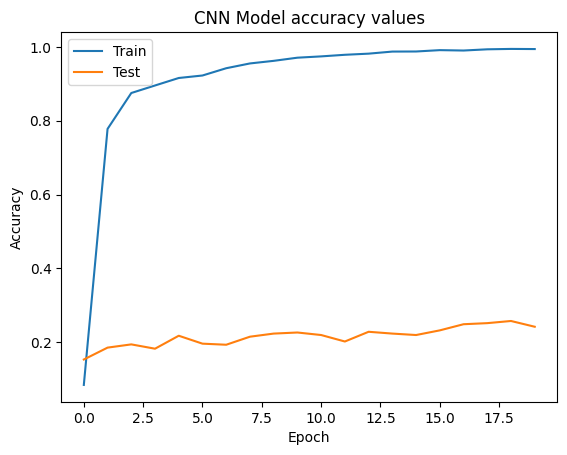

In [16]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

train_loss, train_acc = model.evaluate(train_set)
print(f"Train accuracy: {train_acc * 100:.2f}%")

252/252 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.2547 - loss: 0.7912
Test accuracy: 25.35%
417/417 ━━━━━━━━━━━━━━━━━━━━ 33s 80ms/step - accuracy: 0.9966 - loss: 0.0045
Train accuracy: 99.62%


## resnet50 model

In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [19]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
for layer in resnet.layers:
  layer.trainable = False

In [21]:
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 43,256,900 (165.01 MB)

 Trainable params: 19,669,188 (75.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [22]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [23]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [24]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [25]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 13326 images belonging to 196 classes.


In [26]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8041 images belonging to 196 classes.


In [27]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel_resnet.weights.h5', 
                               verbose=2, save_best_only=True,
                               save_weights_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  validation_steps=32,
    callbacks=callbacks ,verbose=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.0536 - loss: 0.4349
Epoch 1: val_loss improved from inf to 0.19985, saving model to mymodel_resnet.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 54s 104ms/step - accuracy: 0.0538 - loss: 0.4343 - val_accuracy: 0.1875 - val_loss: 0.1998
Epoch 2/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8006 - loss: 0.0403
Epoch 2: val_loss did not improve from 0.19985
417/417 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.8006 - loss: 0.0403 - val_accuracy: 0.2168 - val_loss: 0.2038
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8963 - loss: 0.0232
Epoch 3: val_loss did not improve from 0.19985
417/417 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.8963 - loss: 0.0232 - val_accuracy: 0.2051 - val_loss: 0.2508
Epoch 4/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9099 - loss: 0.0240
Epoch 4: val_loss did not improve from 0.19985
417/417 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.9098 -

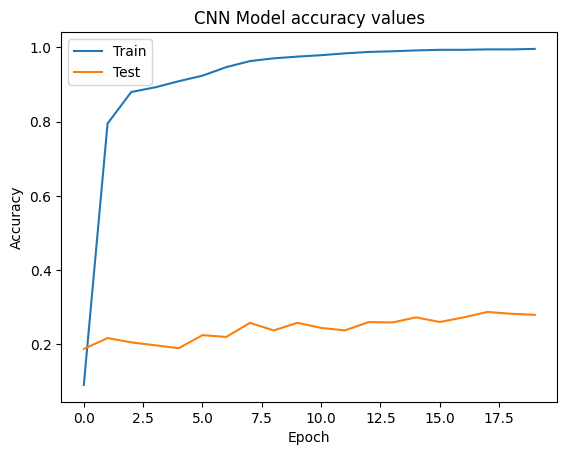

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

train_loss, train_acc = model.evaluate(train_set)
print(f"Train accuracy: {train_acc * 100:.2f}%")

252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.2783 - loss: 0.5154
Test accuracy: 27.33%
417/417 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.9971 - loss: 0.0032
Train accuracy: 99.71%


## Efficientnet


In [30]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras import optimizers


efficientnet = EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in efficientnet.layers:
  layer.trainable = False

x = Flatten()(efficientnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=efficientnet.input, outputs=prediction)
model.summary()



adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

checkpoint = ModelCheckpoint(filepath='mymodel_efficient_net.weights.h5', 
                               verbose=2, save_best_only=True,
                               save_weights_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  validation_steps=32,
    callbacks=callbacks ,verbose=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

train_loss, train_acc = model.evaluate(train_set)
print(f"Train accuracy: {train_acc * 100:.2f}%")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 16,342,887 (62.34 MB)

 Trainable params: 12,293,316 (46.90 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Found 13326 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
Epoch 1/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0619 - loss: 0.1770
Epoch 1: val_loss improved from inf to 0.09014, saving model to mymodel_efficient_net.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 74s 116ms/step - accuracy: 0.0621 - loss: 0.1768 - val_accuracy: 0.1982 - val_loss: 0.0901
Epoch 2/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6671 - loss: 0.0299
Epoch 2: val_loss did not improve from 0.09014
417/417 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.6670 - loss: 0.0299 - val_accuracy: 0.2021 - val_loss: 0.1056
Epoch 3/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7840 - loss: 0.0218
Epoch 3: val_loss did not improve from 0.09014
417/417 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.7839 - loss: 0.0218 - val_accuracy: 0.1982 - val_loss: 0.1197
Epoch 4/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8445 - loss: 0.0183
Epoch 4: val_l

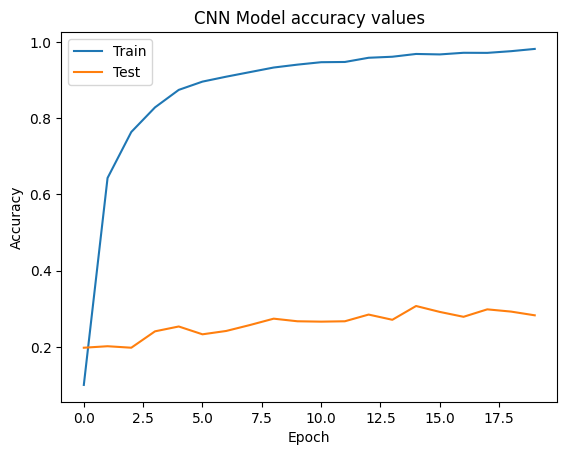

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Inception 

In [32]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras import optimizers


efficientnet = EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in efficientnet.layers:
  layer.trainable = False

x = Flatten()(efficientnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=efficientnet.input, outputs=prediction)
model.summary()



adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

checkpoint = ModelCheckpoint(filepath='mymodel_inception.weights.h5', 
                               verbose=2, save_best_only=True,
                               save_weights_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  validation_steps=32,
    callbacks=callbacks ,verbose=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

train_loss, train_acc = model.evaluate(train_set)
print(f"Train accuracy: {train_acc * 100:.2f}%")

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 16,342,887 (62.34 MB)

 Trainable params: 12,293,316 (46.90 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Found 13326 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
Epoch 1/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0055 - loss: 0.1456
Epoch 1: val_loss improved from inf to 0.09481, saving model to mymodel_inception.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 69s 112ms/step - accuracy: 0.0055 - loss: 0.1454 - val_accuracy: 0.0068 - val_loss: 0.0948
Epoch 2/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0050 - loss: 0.0869
Epoch 2: val_loss improved from 0.09481 to 0.08968, saving model to mymodel_inception.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.0050 - loss: 0.0869 - val_accuracy: 0.0039 - val_loss: 0.0897
Epoch 3/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0042 - loss: 0.0927
Epoch 3: val_loss did not improve from 0.08968
417/417 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.0042 - loss: 0.0927 - val_accuracy: 0.0059 - val_loss: 0.0994
Epoch 4/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - 

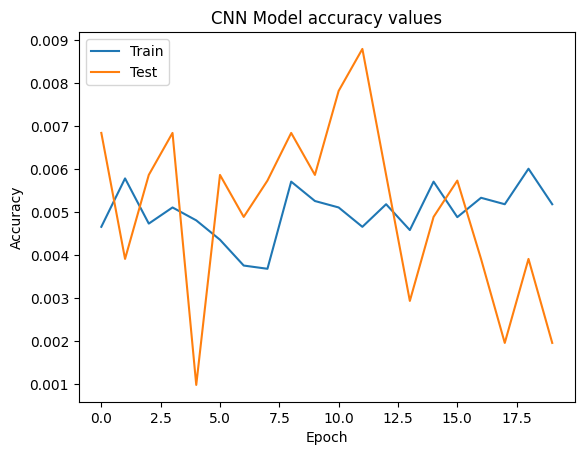

In [33]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Final conclusions

As we can see from the above charts, all the model without any dense or dropout layer before the final classification layer are highly overfitting , with training accuracy of almost 99.5% among all the models , and the highest test accuracy hovering around 30%.

To overcome This we need to add some sort of augmentation and dropout layers .

## VGG16 with extra dense layer and added dropout 

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.layers import Dropout


vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False


prediction = Dense(len(folders), activation='softmax')(x)

x = vgg.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=predictions)
model.summary()



adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

checkpoint = ModelCheckpoint(filepath='mymodel_vgg_dense.weights.h5', 
                               verbose=2, save_best_only=True,
                               save_weights_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  validation_steps=32,
    callbacks=callbacks ,verbose=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

train_loss, train_acc = model.evaluate(train_set)
print(f"Train accuracy: {train_acc * 100:.2f}%")

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 196)            │       100,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,660,804 (105.52 MB)

 Trainable params: 12,946,116 (49.39 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 13326 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
Epoch 1/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.0061 - loss: 0.4021
Epoch 1: val_loss improved from inf to 0.04961, saving model to mymodel_vgg_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.0061 - loss: 0.4016 - val_accuracy: 0.0117 - val_loss: 0.0496
Epoch 2/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0083 - loss: 0.0804
Epoch 2: val_loss improved from 0.04961 to 0.04470, saving model to mymodel_vgg_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.0083 - loss: 0.0804 - val_accuracy: 0.0117 - val_loss: 0.0447
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0093 - loss: 0.0656
Epoch 3: val_loss improved from 0.04470 to 0.03951, saving model to mymodel_vgg_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.0093 - loss: 0.0656 - val_accuracy: 0.0029 - val_loss: 0.0395
Epoch 

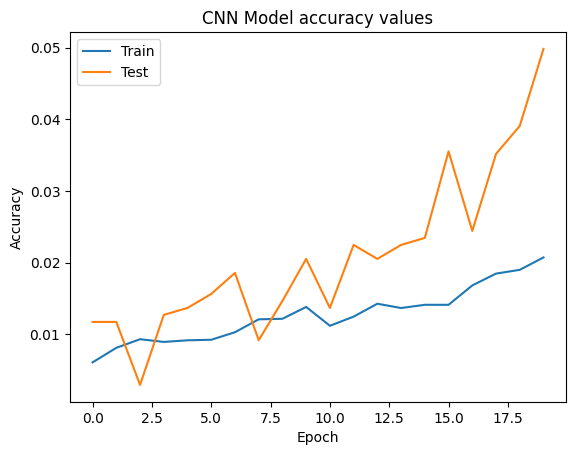

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

resnet50 with dense and dropout layer

In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras import optimizers


resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in resnet.layers:
  layer.trainable = False


prediction = Dense(len(folders), activation='softmax')(x)

x = resnet.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=predictions)
model.summary()



adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

checkpoint = ModelCheckpoint(filepath='mymodel_resnet_dense.weights.h5', 
                               verbose=2, save_best_only=True,
                               save_weights_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  validation_steps=32,
    callbacks=callbacks ,verbose=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

train_loss, train_acc = model.evaluate(train_set)
print(f"Train accuracy: {train_acc * 100:.2f}%")

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 75,068,996 (286.37 MB)

 Trainable params: 51,481,284 (196.39 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 13326 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
Epoch 1/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.0068 - loss: 0.2806
Epoch 1: val_loss improved from inf to 0.05606, saving model to mymodel_resnet_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 56s 106ms/step - accuracy: 0.0068 - loss: 0.2802 - val_accuracy: 0.0137 - val_loss: 0.0561
Epoch 2/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0085 - loss: 0.0733
Epoch 2: val_loss improved from 0.05606 to 0.03963, saving model to mymodel_resnet_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.0085 - loss: 0.0733 - val_accuracy: 0.0107 - val_loss: 0.0396
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0085 - loss: 0.0586
Epoch 3: val_loss improved from 0.03963 to 0.03759, saving model to mymodel_resnet_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.0085 - loss: 0.0586 - val_accuracy: 0.0059 - val_loss: 0.0

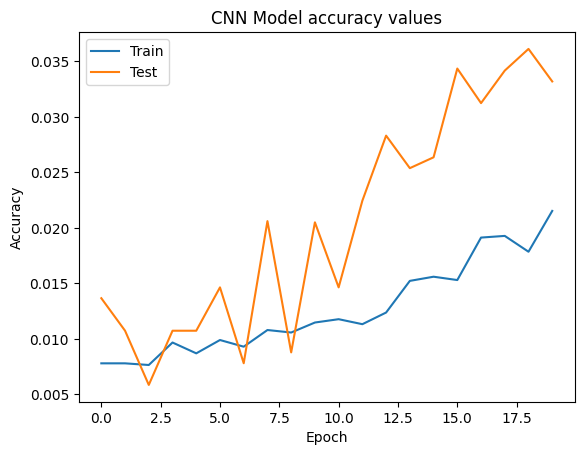

In [37]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

inception with dense and dropout layer

In [38]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras import optimizers


inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
  layer.trainable = False


prediction = Dense(len(folders), activation='softmax')(x)

x = inception.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.summary()



adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

checkpoint = ModelCheckpoint(filepath='mymodel_inception_dense.weights.h5', 
                               verbose=2, save_best_only=True,
                               save_weights_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  validation_steps=32,
    callbacks=callbacks ,verbose=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

train_loss, train_acc = model.evaluate(train_set)
print(f"Train accuracy: {train_acc * 100:.2f}%")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 48,118,244 (183.56 MB)

 Trainable params: 26,315,460 (100.39 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Found 13326 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
Epoch 1/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.0075 - loss: 0.2025
Epoch 1: val_loss improved from inf to 0.04246, saving model to mymodel_inception_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 58s 102ms/step - accuracy: 0.0075 - loss: 0.2020 - val_accuracy: 0.0078 - val_loss: 0.0425
Epoch 2/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0086 - loss: 0.0586
Epoch 2: val_loss improved from 0.04246 to 0.04133, saving model to mymodel_inception_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.0086 - loss: 0.0586 - val_accuracy: 0.0078 - val_loss: 0.0413
Epoch 3/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0079 - loss: 0.0501
Epoch 3: val_loss improved from 0.04133 to 0.03761, saving model to mymodel_inception_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.0079 - loss: 0.0501 - val_accuracy: 0.0098 - val_

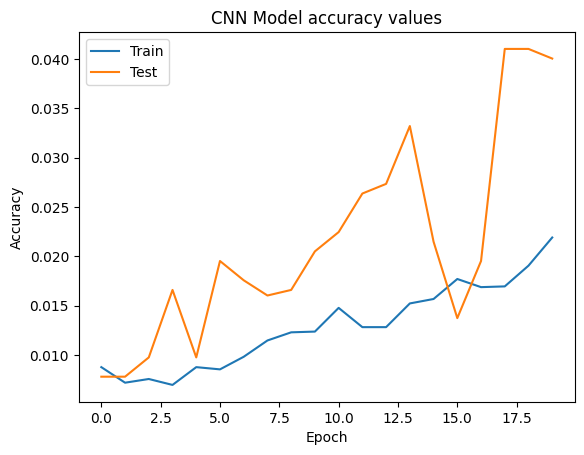

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

efficientnet

In [40]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras import optimizers


efficientnet = EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in efficientnet.layers:
  layer.trainable = False


prediction = Dense(len(folders), activation='softmax')(x)

x = efficientnet.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=efficientnet.input, outputs=predictions)
model.summary()



adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

checkpoint = ModelCheckpoint(filepath='mymodel_efficient_dense.weights.h5', 
                               verbose=2, save_best_only=True,
                               save_weights_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  validation_steps=32,
    callbacks=callbacks ,verbose=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

train_loss, train_acc = model.evaluate(train_set)
print(f"Train accuracy: {train_acc * 100:.2f}%")

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 48,118,244 (183.56 MB)

 Trainable params: 26,315,460 (100.39 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Found 13326 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
Epoch 1/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0056 - loss: 4.5355
Epoch 1: val_loss improved from inf to 0.07283, saving model to mymodel_efficient_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 51s 95ms/step - accuracy: 0.0056 - loss: 4.5206 - val_accuracy: 0.0049 - val_loss: 0.0728
Epoch 2/20
416/417 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0045 - loss: 0.2725
Epoch 2: val_loss improved from 0.07283 to 0.06161, saving model to mymodel_efficient_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.0045 - loss: 0.2724 - val_accuracy: 0.0068 - val_loss: 0.0616
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0047 - loss: 0.1917
Epoch 3: val_loss improved from 0.06161 to 0.05062, saving model to mymodel_efficient_dense.weights.h5
417/417 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.0047 - loss: 0.1917 - val_accuracy: 0.0049 - val_l

In [41]:
! ls /kaggle/working/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


mymodel_efficient_dense.weights.h5  mymodel_resnet.weights.h5
mymodel_efficient_net.weights.h5    mymodel_resnet_dense.weights.h5
mymodel_inception.weights.h5	    mymodel_vgg_16.weights.h5
mymodel_inception_dense.weights.h5  mymodel_vgg_dense.weights.h5


In [42]:
!zip -r model_weights.zip /kaggle/working/*.h5

  adding: kaggle/working/mymodel_efficient_dense.weights.h5 (deflated 33%)
  adding: kaggle/working/mymodel_efficient_net.weights.h5 (deflated 8%)
  adding: kaggle/working/mymodel_inception.weights.h5 (deflated 8%)
  adding: kaggle/working/mymodel_inception_dense.weights.h5 (deflated 30%)
  adding: kaggle/working/mymodel_resnet.weights.h5 (deflated 7%)
  adding: kaggle/working/mymodel_resnet_dense.weights.h5 (deflated 39%)
  adding: kaggle/working/mymodel_vgg_16.weights.h5 (deflated 8%)
  adding: kaggle/working/mymodel_vgg_dense.weights.h5 (deflated 36%)


## Final conclusions 

Model results without dense or dropout layers 
1. vgg16 test- 25.35 train- 99.62
2. resnet test- 27.33 train- 99.71
3. efficientnet test- 30.10 train- 99.38
4. inception test- 22.60 train- 99.47

results with dense and dropout layers

1. vgg16 test- 3.87 train- 4.71
2. resnet test- 4.07 train- 4.69
3. inception test- 3.68 train- 4.09
4. efficientnet test- 0.5 train- 0.5

only adding a single dropout and dense layer is leading to severe underfitting , meaning the model is failing to learn from our dataset even after high epochs , meaning we have to consider fine tuning the top layers of the above models , as that will help our model to learn the intricate details of our highly complex dataset